In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def divide_set(matrix):
    densidad_5_6 = matrix[:, matrix[0] < 4400]
    densidad_6_7 = matrix[:, (4400 <= matrix[0]) & (matrix[0] < 8000)]
    densidad_7_8 = matrix[:, (8000 <= matrix[0]) & (matrix[0] < 11600)]
    densidad_8_9 = matrix[:, (11600 <= matrix[0]) & (matrix[0] < 15200)]
    densidad_9_10 = matrix[:, 15200 <= matrix[0]]

    return densidad_5_6, densidad_6_7, densidad_7_8, densidad_8_9, densidad_9_10

In [3]:
# Itero sobre los results, para cada result hago:

# for j in range(8):
#     pos = np.load(f'npys/fast_road_11-09/pos{j}.npy')
#     spd = np.load(f'npys/fast_road_11-09/spd{j}.npy')
#     globals()[f'results{j}'] = np.load(f'npys/fast_road_11-09/results{j}.npy')

#     new_rows = np.zeros((2, globals()[f'results{j}'].shape[1]))
#     globals()[f'results{j}'] = np.vstack((globals()[f'results{j}'], new_rows))

#     ide = np.load('npys/fast_road_11-09/first_ids.npy')[j]

#     for i in range(globals()[f'results{j}'].shape[1]):
#         window1 = np.where((pos[ide+i] >= 2000) & (pos[ide+i] <= 2500))[0]
#         window2 = np.where((pos[ide+i] >= 6000) & (pos[ide+i] <= 6650))[0]
#         window3 = np.where((pos[ide+i] >= 11700) & (pos[ide+i] <= 12350))[0]

#         window = np.hstack((window1, window2))
#         window = np.hstack((window, window3))

#         window = pd.Series(window)

#         index_max = int(globals()[f'results{j}'][1,i]) # fila 1, agente i --> cuando salió
#         index_min = int(globals()[f'results{j}'][0,i]) # fila 0, agente i --> cuando entró

#         all_indexes_for_agent = pd.Series(np.arange(len(pos[ide+i]))[index_min:index_max+1])
#         out_window = all_indexes_for_agent[~all_indexes_for_agent.isin(window)]

#         en_ventana = np.mean(spd[ide+i,window.to_numpy()])
#         no_ventana = np.mean(spd[ide+i,out_window.to_numpy()])

#         globals()[f'results{j}'][5,i] = en_ventana
#         globals()[f'results{j}'][6,i] = no_ventana

In [4]:
# Para dentro de la ventan --> fila 5
mean_5_6_in = []
mean_6_7_in = []
mean_7_8_in = []
mean_8_9_in = []
mean_9_10_in = []
mean_gen_in = []
# Para fuera de la ventana --> fila 6
mean_5_6_out = []
mean_6_7_out = []
mean_7_8_out = []
mean_8_9_out = []
mean_9_10_out = []
mean_gen_out = []
# Para general --> fila 3
mean_5_6 = []
mean_6_7 = []
mean_7_8 = []
mean_8_9 = []
mean_9_10 = []
mean_gen = []

for j in range(30):
    globals()[f'results{j}'] = np.load(f'results/results{j}.npy')
    d_5_6, d_6_7, d_7_8, d_8_9, d_9_10 = divide_set(globals()[f'results{j}'])

    # Para dentro de la ventan --> fila 5
    mean_5_6_in.append(np.mean(d_5_6[5,:]))
    mean_6_7_in.append(np.mean(d_6_7[5,:]))
    mean_7_8_in.append(np.mean(d_7_8[5,:]))
    mean_8_9_in.append(np.mean(d_8_9[5,:]))
    mean_9_10_in.append(np.mean(d_9_10[5,:]))
    mean_gen_in.append(np.mean(globals()[f'results{j}'][5,:]))
    # Para fuera de la ventana --> fila 6
    mean_5_6_out.append(np.mean(d_5_6[6,:]))
    mean_6_7_out.append(np.mean(d_6_7[6,:]))
    mean_7_8_out.append(np.mean(d_7_8[6,:]))
    mean_8_9_out.append(np.mean(d_8_9[6,:]))
    mean_9_10_out.append(np.mean(d_9_10[6,:]))
    mean_gen_out.append(np.mean(globals()[f'results{j}'][6,:]))
    # Para general --> fila 3
    mean_5_6.append(np.mean(d_5_6[3,:]))
    mean_6_7.append(np.mean(d_6_7[3,:]))
    mean_7_8.append(np.mean(d_7_8[3,:]))
    mean_8_9.append(np.mean(d_8_9[3,:]))
    mean_9_10.append(np.mean(d_9_10[3,:]))
    mean_gen.append(np.mean(globals()[f'results{j}'][3,:]))

tabla = np.zeros((6,3))

tabla[0,0] = np.mean(mean_5_6_in)
tabla[1,0] = np.mean(mean_6_7_in)
tabla[2,0] = np.mean(mean_7_8_in)
tabla[3,0] = np.mean(mean_8_9_in)
tabla[4,0] = np.mean(mean_9_10_in)
tabla[5,0] = np.mean(mean_gen_in)

tabla[0,1] = np.mean(mean_5_6_out)
tabla[1,1] = np.mean(mean_6_7_out)
tabla[2,1] = np.mean(mean_7_8_out)
tabla[3,1] = np.mean(mean_8_9_out)
tabla[4,1] = np.mean(mean_9_10_out)
tabla[5,1] = np.mean(mean_gen_out)

tabla[0,2] = np.mean(mean_5_6)
tabla[1,2] = np.mean(mean_6_7)
tabla[2,2] = np.mean(mean_7_8)
tabla[3,2] = np.mean(mean_8_9)
tabla[4,2] = np.mean(mean_9_10)
tabla[5,2] = np.mean(mean_gen)

tabla

array([[20.76921555, 21.99384488, 21.8361844 ],
       [18.17453303, 19.31230975, 19.16654785],
       [18.27494426, 19.35902852, 19.22030582],
       [17.85462147, 18.95825333, 18.81694649],
       [17.77138741, 18.89205933, 18.74860925],
       [18.19039448, 19.30974932, 19.16638156]])

In [5]:
from sklearn.neighbors import KernelDensity

curvas = {
    '5_6': [],
    '6_7': [],
    '7_8': [],
    '8_9': [],
    '9_10': [],
    'gen': []
}

# Define bandwidth and datasets
bandwidth = 0.5

for i in range(30):
    d_5_6, d_6_7, d_7_8, d_8_9, d_9_10 = divide_set(globals()[f'results{i}'])

    data_global = globals()[f'results{i}'][2,:]
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(data_global.reshape(-1, 1))
    
    x_vals = np.linspace(min(data_global), max(data_global), 10000)
    log_dens = kde.score_samples(x_vals.reshape(-1, 1))
    dens = np.exp(log_dens)

    curvas['gen'].append((x_vals, dens))

    datasets = [d_5_6, d_6_7, d_7_8, d_8_9, d_9_10]

    # Iterate through the datasets
    for j, dataset in enumerate(datasets, start=5):
        kde = KernelDensity(bandwidth=bandwidth)
        kde.fit(dataset[2, :].reshape(-1, 1))
        
        x_vals = np.linspace(min(dataset[2, :]), max(dataset[2, :]), 10000)
        log_dens = kde.score_samples(x_vals.reshape(-1, 1))
        dens = np.exp(log_dens)
        
        key = f'{j}_{j+1}'  # Create a key based on the current dataset indices
        curvas[key].append((x_vals, dens))


C:\Users\gaston\AppData\Local\Temp\ipykernel_22176\1282437418.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 31)


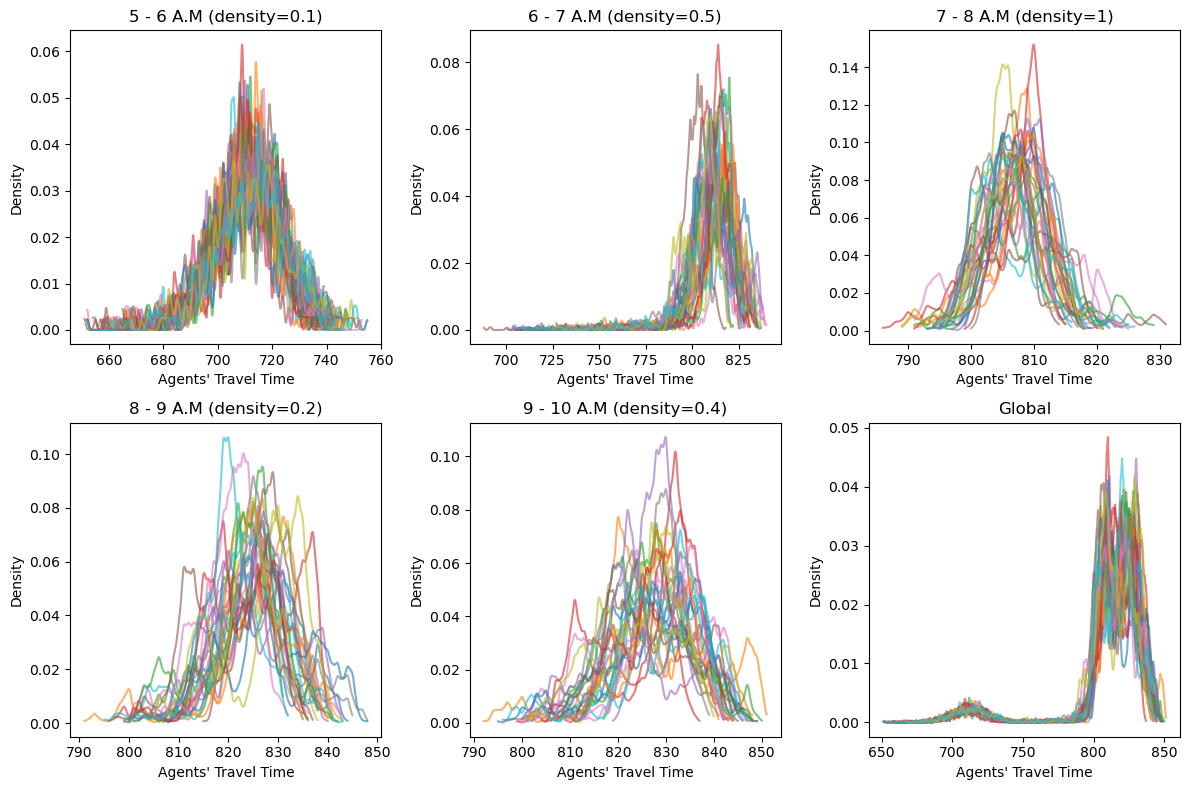

In [12]:
# Define the number of rows and columns for the grid plot
num_rows = 2  # You can adjust this based on your preferences
num_cols = 3

# Define a list of density values
density_values = [0.1, 0.5, 1, 0.2, 0.4]

# Define a function to transform keys
def transform_key(key, i):
    if key == "gen":
        return "Global"
    else:
        parts = key.split('_')
        start_hour = parts[0]
        end_hour = parts[1]
        return f"{start_hour} - {end_hour} A.M (density={density_values[i % len(density_values)]})"

colors = plt.cm.get_cmap('tab20', 31)

# Create a subplot grid for each key in curvas
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
color_index = 0
# Iterate through the keys in curvas and plot the curves
for i, (key, curves) in enumerate(curvas.items()):
    row = i // num_cols
    col = i % num_cols
    
    ax = axs[row, col]
    
    # Transform the key to the desired format
    transformed_key = transform_key(key, i)
    ax.set_title(transformed_key)
    
    for x_vals, dens in curves:
        color = colors(j) 
        ax.plot(x_vals, dens, alpha=0.6)
        color_index += 1
    
    ax.set_xlabel("Agents' Travel Time")
    ax.set_ylabel('Density')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

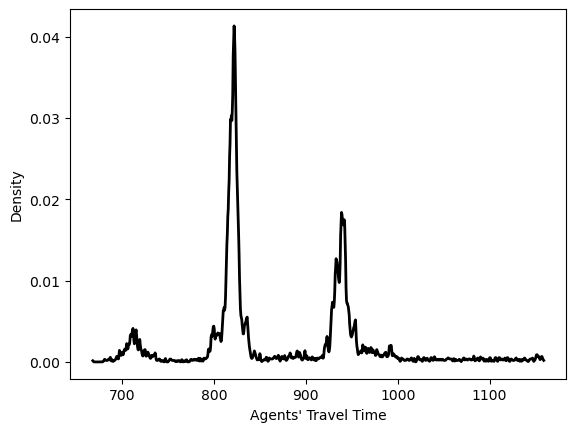

In [13]:
from sklearn.neighbors import KernelDensity

data = np.load("results/results_choque.npy")
d_5_6, d_6_7, d_7_8, d_8_9, d_9_10 = divide_set(data)

# Step 3: Fit an empirical curve (Kernel Density Estimation)
kde = KernelDensity(bandwidth=0.5)  # You can adjust the bandwidth
kde.fit(data.reshape(-1, 1))

# Step 4: Generate values for the empirical curve
x_vals = np.linspace(min(data), max(data), 1000)
log_dens = kde.score_samples(x_vals.reshape(-1, 1))
dens = np.exp(log_dens)

# Step 5: Plot the histogram and the empirical curve
# plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Histogram')
plt.plot(x_vals, dens, 'k-', linewidth=2)

# Add labels and legend
plt.xlabel("Agents' Travel Time")
plt.ylabel('Density')

# Show the plot
plt.show()